In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
import scipy
import seaborn as sns
import pandas as pd
from datetime import datetime, timedelta
import random
from IPython.display import clear_output

# Assumptions

#### Energy generation
1 nuclear power plant --- 7.9 TWh energy/year     <br>
1 wind turbine        ---                   Surface ->  (how much space does 1 w.t. require)      <br>
1 solar panel farm  ---                   Surface ->  (which surface produces that energy)     <br>
Mixed strategies?
Max # of nucl / county ?

#### Energy consumption and storage
Energy consumption per capita (CH) = 6,260 kWh / year       <br>
How much energy can a county store?

#### For later - Energy export/import
Rule: No falling under the population needs
Sell/buy to/from neighbours?
Money needed for further commissioning

#### Prices
1 nuclear power plant - 8.1-8.6 billion $ per plant
1 wind turbine - 

In [19]:
# Sample coordinates
city_coords = {
    'Bucharest': (44.4268, 26.1025),
    'Cluj-Napoca': (46.7712, 23.6236),
    'Constanta': (44.1598, 28.6348),
    'Iasi': (47.1585, 27.6014),
    'Craiova': (44.3302, 23.7949)
}

def get_color(county):
    """Get color based on light status."""
    if county.light_status == 1:
        return 'yellow'  # Sunny
    elif county.light_status == 0.5:
        return 'gray'  # Cloudy
    else:
        return 'black'  # Nighttime
    
def get_marker_size(county):
    """Get marker size based on wind speed."""
    return max(10, county.wind_speed * 2)  # Minimum size of 10, scale by wind speed

In [26]:
class Clock:
    _instance = None  # Singleton instance
    
    def __new__(cls, initial_time=None):
        if cls._instance is None:
            cls._instance = super(Clock, cls).__new__(cls)
            cls._instance.current_time = initial_time
        return cls._instance
    
    def advance(self, hours=4):
        """Advance simulation time by given hours (default: 4)."""
        self.current_time += timedelta(hours=hours)
    
    def get_time(self):
        """Get current simulation time."""
        return self.current_time
    
    def __str__(self):
        return f"Simulation Time: {self.current_time.strftime('%Y-%m-%d %H:%M')}"
    
class County:
    def __init__(self, name, area, population, initial_wind_speed=0):
        self.name = name
        self.area = area  # km²
        self.population = population
        self.wind_speed = initial_wind_speed  # m/s
        self.light_status = 0
        self.clock = Clock()  # Shared clock
        
    def update_weather(self):
        """Update wind and light based on current time."""
        self._update_wind_speed()
        self._update_light_status()
    
    def _update_wind_speed(self):
        new_speed = max(0, random.gauss(self.wind_speed, 2))  # ≥0, σ=2 m/s
        self.wind_speed = new_speed
        print(f"[{self.clock.get_time().strftime('%H:%M')}] {self.name}: Wind = {new_speed:.1f} m/s")
    
    def _update_light_status(self):
        hour = self.clock.get_time().hour
        if 4 <= hour < 20:  # Daytime (4 AM–8 PM)
            self.light_status = random.choice([1, 0.5])  # Sunny or cloudy
        else:  # Nighttime (8 PM–4 AM)
            self.light_status = 0
        print(f"[{self.clock.get_time().strftime('%H:%M')}] {self.name}: Light = {self.light_status}")

class Country:
    def __init__(self, name):
        self.name = name
        self.counties = []
        self.clock = Clock()  # Shared clock
    
    def add_county(self, county):
        """Add a county to the country."""
        self.counties.append(county)
    
    def advance_time(self, hours=4):
        """Advance time and update all counties."""
        self.clock.advance(hours)
        print(f"\n--- Time advanced to {self.clock.get_time().strftime('%Y-%m-%d %H:%M')} ---")
        for county in self.counties:
            county.update_weather()

    def plot_county_weather(self):
        """Plot weather data for each county."""
        plt.figure(figsize=(12, 6))
        for county in self.counties:
            city = county.name
            size = get_marker_size(county)
            color = get_color(county)
            plt.plot(city_coords[city][1], city_coords[city][0], 'o', color = color, markersize = size, label=city)

        plt.title('Cities in Romania - Time: ' + self.clock.get_time().strftime('%Y-%m-%d %H:%M'))
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.xlim(22, 30)
        plt.ylim(43, 48)
        plt.show()
    
    def simulate(self, steps=6, delay_seconds=1):
        """Run simulation for `steps` (each step = 4 hours)."""
        for step in range(steps):
            clear_output(wait=0)  # Clear output for next step
            print(f"\nStep {step + 1}/{steps}:")
            self.advance_time()
            import time
            self.plot_county_weather()
            time.sleep(delay_seconds)  # Pause between steps

    



Step 18/18:

--- Time advanced to 2025-01-04 00:00 ---
[00:00] Bucharest: Wind = 2.5 m/s
[00:00] Bucharest: Light = 0
[00:00] Cluj-Napoca: Wind = 5.8 m/s
[00:00] Cluj-Napoca: Light = 0
[00:00] Constanta: Wind = 1.7 m/s
[00:00] Constanta: Light = 0
[00:00] Iasi: Wind = 5.6 m/s
[00:00] Iasi: Light = 0
[00:00] Craiova: Wind = 0.0 m/s
[00:00] Craiova: Light = 0


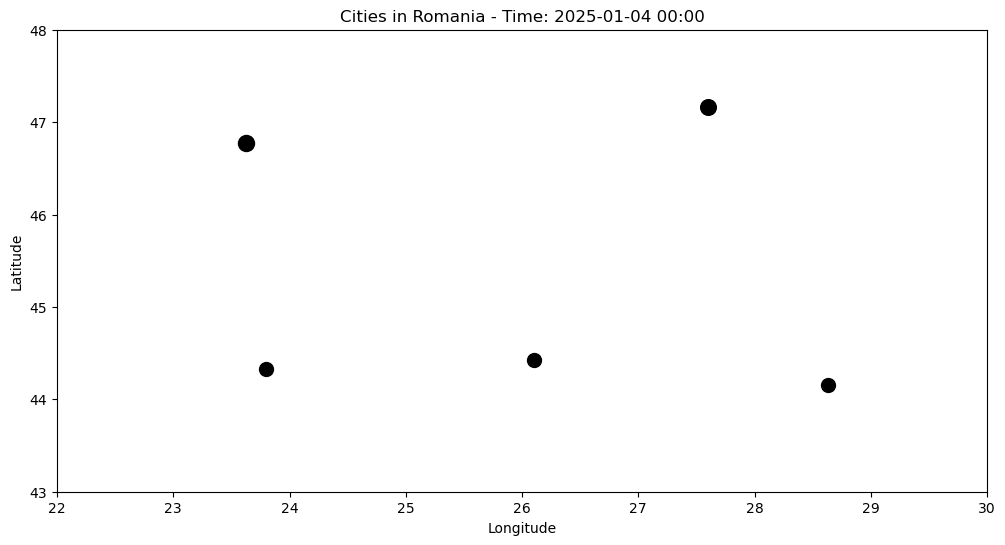

In [27]:
Clock(initial_time=datetime(2025, 1, 1, 0, 0))  # Initialize clock on January 1, 2025 at midnight

# Create a country and add counties
country = Country("Romania")
initial_wind_speeds = np.random.uniform(0, 12, 5)  # Initial wind speeds in m/s

county1 = County("Bucharest", area=228, population=1883425, initial_wind_speed=initial_wind_speeds[0])
county2 = County("Cluj-Napoca", area=179, population=324576, initial_wind_speed=initial_wind_speeds[1])
county3 = County("Constanta", area=124, population=303399, initial_wind_speed=initial_wind_speeds[2])
county4 = County("Iasi", area=93, population=290422, initial_wind_speed=initial_wind_speeds[3])
county5 = County("Craiova", area=81, population=269506, initial_wind_speed=initial_wind_speeds[4])
country.add_county(county1)
country.add_county(county2)
country.add_county(county3)
country.add_county(county4)
country.add_county(county5)

# Run the simulation
n_steps = 18  # Total steps (4 hours each, 72 hours total)
country.simulate(steps=n_steps, delay_seconds=1)

#Put the data into a DataFrame for visualization
data = {
    "County": [],
    "Time": [],
    "Wind Speed (m/s)": [],
    "Light Status": []
}
for county in country.counties:
    for step in range(n_steps):
        time = Clock().get_time() + timedelta(hours=step * 4)
        data["County"].append(county.name)
        data["Time"].append(time.strftime('%Y-%m-%d %H:%M'))
        data["Wind Speed (m/s)"].append(county.wind_speed)
        data["Light Status"].append(county.light_status)

df = pd.DataFrame(data)
